# House Price Prediction:
Mr. John Hughes has been reviewing the house_price.csv dataset. The dataset
shows the housing price in a city say “XYZ” over a period of time.

# Dataset Description:
The dataset contains the following variables:
## Independent Variables:
id - Unique ID for each home sold

date - Date of the home sale

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but
no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A variable for whether the apartment was overlooking the waterfront
or not

view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and
design, 7 has an average level of construction and design, and 11-13 have a high
quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground
level

sqft_basement - The square footage of the interior housing space that is below
ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

sqft_living15 - The square footage of interior housing living space for the nearest
15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Dependent Variables
price - Price of each home sold


In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg
from sklearn.linear_model import LinearRegression


In [3]:
df=pd.read_csv("house_price.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [5]:
new_df=df.drop(columns="id")
new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [6]:
def change_date(x):
    a=[]
    for i in x:
        a.append(i[:4]+"/"+i[4:6]+"/"+i[6:8])
        
    a=pd.Series(a)
    return pd.to_datetime(a)
    
new_df["date"]=change_date(df["date"])
new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [8]:
new_df["Day"]=new_df["date"].dt.day
new_df["Month"]=new_df["date"].dt.month
new_df["Year"]=new_df["date"].dt.year

In [9]:
new_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Day,Month,Year
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652,15.688197,6.574423,2014.322954
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631,8.635063,3.115308,0.467616
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,1.000000,1.000000,2014.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,8.000000,4.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,16.000000,6.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,23.000000,9.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,31.000000,12.000000,2015.000000


In [10]:
new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Day,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,1340,5650,13,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,1690,7639,9,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,2720,8062,25,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,1360,5000,9,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,1800,7503,18,2,2015


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [12]:
new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Day,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,1340,5650,13,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,1690,7639,9,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,2720,8062,25,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,1360,5000,9,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,1800,7503,18,2,2015


In [13]:
new_df["Year"].value_counts()

2014    14633
2015     6980
Name: Year, dtype: int64

# Month wise comparison of prices for different years.

In [14]:
group_year_2014=new_df[new_df["Year"]==2014].groupby(by="Month")
group_year_2015=new_df[new_df["Year"]==2015].groupby(by="Month")

In [15]:
group_year_2014.median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Day,Year
Month,,,,,,,,,,,,,,,,,,,
5,465000.0,3.0,2.25,1945.0,7560.0,1.5,0.0,0.0,3.0,7.0,1550.0,0.0,1975.0,0.0,98072.0,1840.0,7602.5,16.0,2014.0
6,465000.0,3.0,2.25,1980.0,7700.0,1.5,0.0,0.0,3.0,8.0,1600.0,0.0,1975.0,0.0,98072.0,1890.0,7720.0,17.0,2014.0
7,465000.0,3.0,2.25,1950.0,7695.0,1.5,0.0,0.0,3.0,8.0,1610.0,0.0,1977.0,0.0,98059.0,1870.0,7650.0,16.0,2014.0
8,442100.0,3.0,2.25,1940.0,7808.5,1.0,0.0,0.0,3.0,7.0,1590.0,0.0,1976.0,0.0,98059.0,1860.0,7753.5,15.0,2014.0
9,450000.0,3.0,2.25,1920.0,7620.0,1.5,0.0,0.0,3.0,7.0,1580.0,0.0,1974.0,0.0,98065.0,1830.0,7515.5,16.0,2014.0
10,446900.0,3.0,2.25,1900.0,7413.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1974.0,0.0,98065.0,1850.0,7457.0,16.0,2014.0
11,435000.0,3.0,2.00,1870.0,7500.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1973.0,0.0,98070.0,1800.0,7515.0,14.0,2014.0
12,432500.0,3.0,2.25,1900.0,7720.0,1.0,0.0,0.0,3.0,7.0,1540.0,0.0,1974.0,0.0,98070.0,1820.0,7680.0,12.0,2014.0


In [16]:
group_year_2015.median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Day,Year
Month,,,,,,,,,,,,,,,,,,,
1,438500.0,3.0,2.25,1890.0,7800.0,1.0,0.0,0.0,3.0,7.0,1570.0,0.0,1974.0,0.0,98065.0,1800.0,7700.0,16.0,2015.0
2,425545.0,3.0,2.00,1830.0,7666.0,1.0,0.0,0.0,3.0,7.0,1485.0,0.0,1974.0,0.0,98059.0,1800.0,7636.0,18.0,2015.0
3,450000.0,3.0,2.25,1870.0,7560.0,1.0,0.0,0.0,3.0,7.0,1540.0,0.0,1973.0,0.0,98065.0,1820.0,7647.0,18.0,2015.0
4,476500.0,3.0,2.25,1900.0,7500.0,1.5,0.0,0.0,3.0,7.0,1540.0,0.0,1976.0,0.0,98072.0,1840.0,7560.0,16.0,2015.0
5,455000.0,3.0,2.00,1845.0,7260.0,1.0,0.0,0.0,3.0,7.0,1510.0,0.0,1972.0,0.0,98065.0,1810.0,7385.5,6.0,2015.0


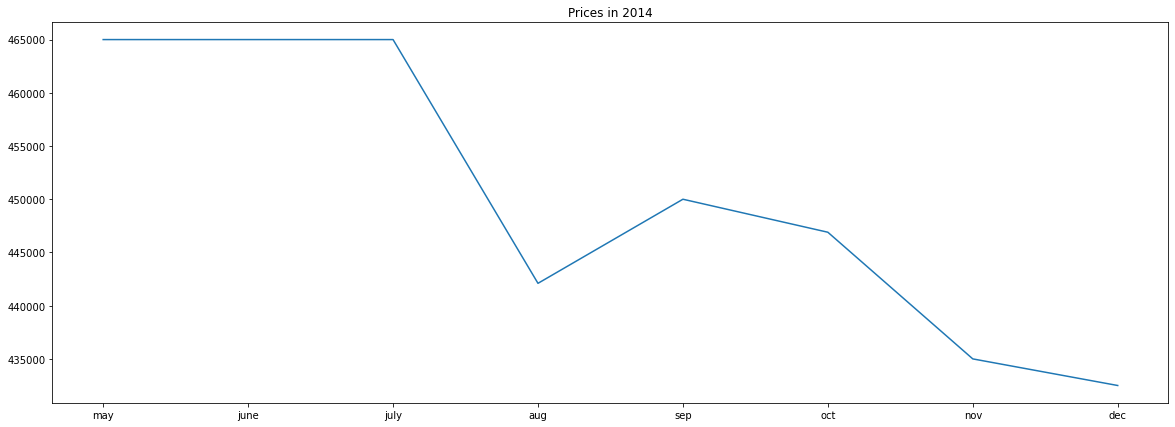

In [17]:
month_names=["jan","feb","mar","april","may","june","july","aug","sep","oct","nov","dec"]
plt.figure(figsize=(20,7))
plt.title("Prices in 2014")
plt.plot(month_names[4:],group_year_2014.median()["price"])
plt.show()

## observations:
Clearly,the prices were at its peak till july 2014 and then they reduced in august with the lowest in december.

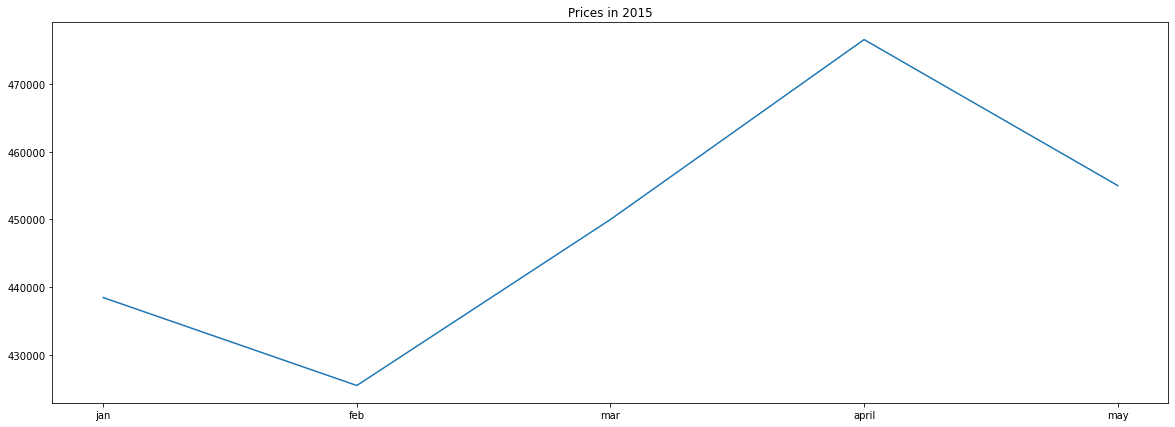

In [18]:
#month wise prices for the year 2015
plt.figure(figsize=(20,7))
plt.title("Prices in 2015")
plt.plot(month_names[:5],group_year_2015.median()["price"])
plt.show()

## Observations:
the prices were the highest in april in 2015 and lowest in february

# Finding correlation between features

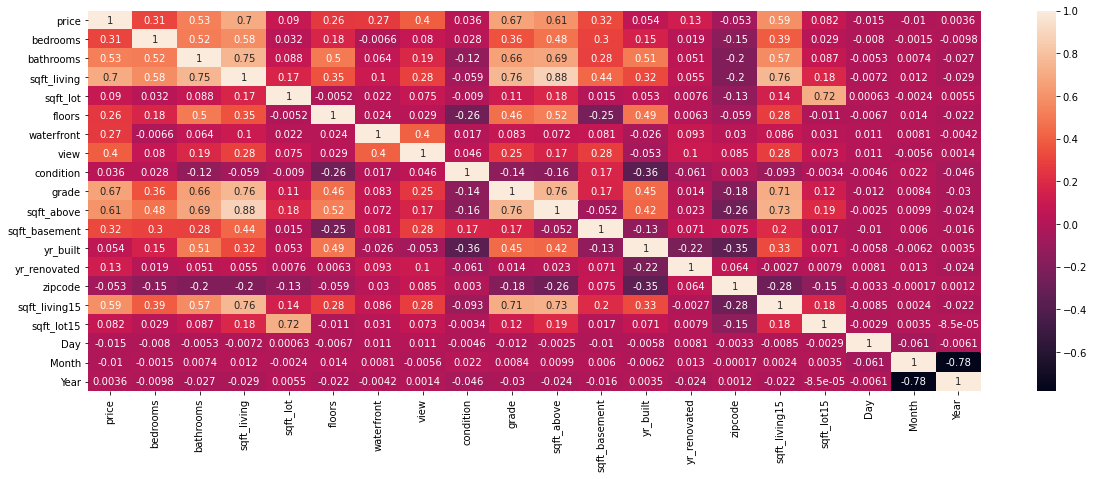

In [19]:
plt.figure(figsize=(20,7))
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [20]:
new_df.drop(columns=["date","sqft_lot","yr_built","zipcode","sqft_lot15","condition","Day"],inplace=True)

In [21]:
new_df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,Month,Year
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,1340,10,2014
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,1690,12,2014
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,2720,2,2015
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,1360,12,2014
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,1800,2,2015


In [22]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
X=new_df.iloc[:,1:]
y=new_df["price"]
seed=7
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=seed)

# Linear Regression model

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.6085393212920173

In [24]:
ypred=lr.predict(X_test)
ypred

array([239268.05583084, 784323.75959547, 838740.32509704, ...,
       322983.25601614, 405161.33678594, 421256.51067971])

In [25]:
# checking the accuracy report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("mean absolute error:",mean_absolute_error(y_test,ypred))
print("mean squared error:",mean_squared_error(y_test,ypred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,ypred)))
print("r2 score:",r2_score(y_test,ypred))

mean absolute error: 152991.59093163468
mean squared error: 54812795642.09987
root mean squared error: 234121.32675623524
r2 score: 0.5854927944001602


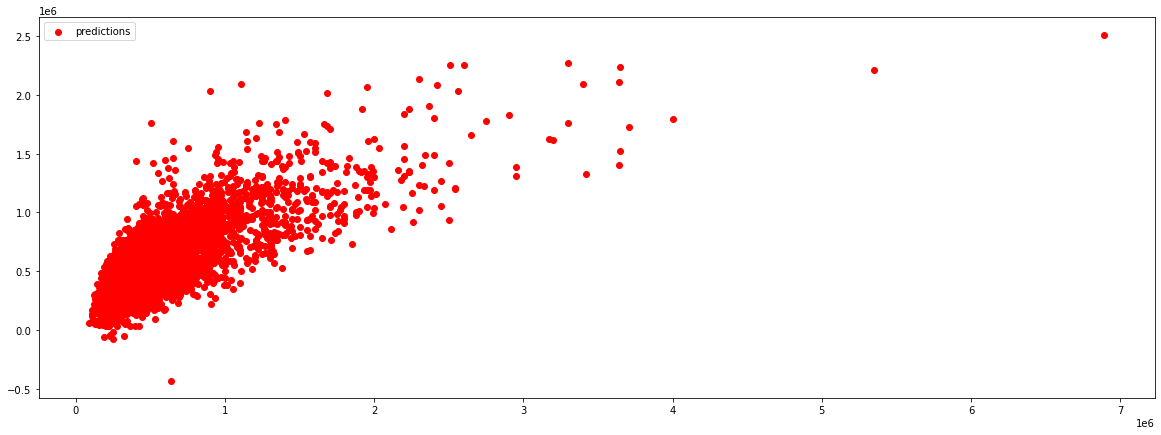

In [26]:
# checking relationship between ytest and ypred
plt.figure(figsize=(20,7))
plt.scatter(y_test,ypred,label="predictions",color="red")
plt.legend()
plt.show()

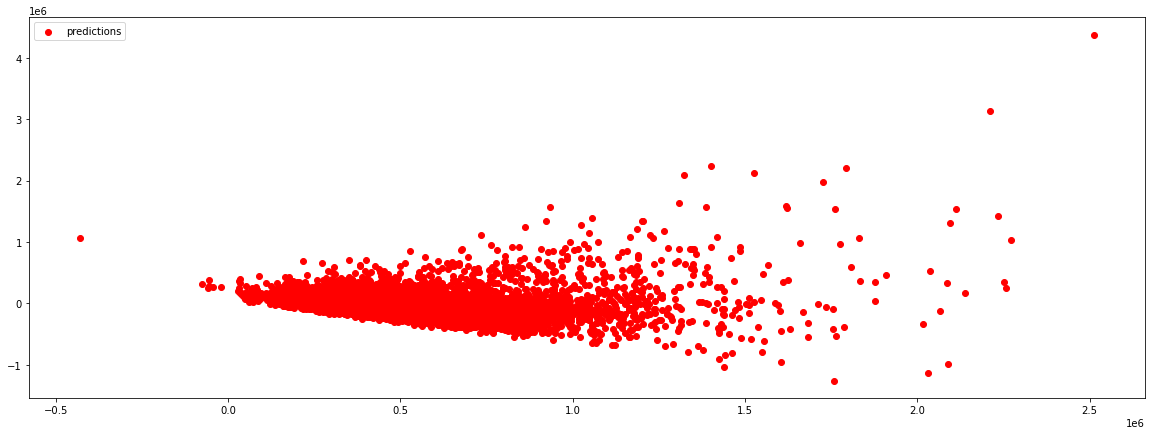

In [27]:
#checking relationshio between predictions and error
error=y_test-ypred
plt.figure(figsize=(20,7))
plt.scatter(ypred,error,label="predictions",color="red")
plt.legend()
plt.show()

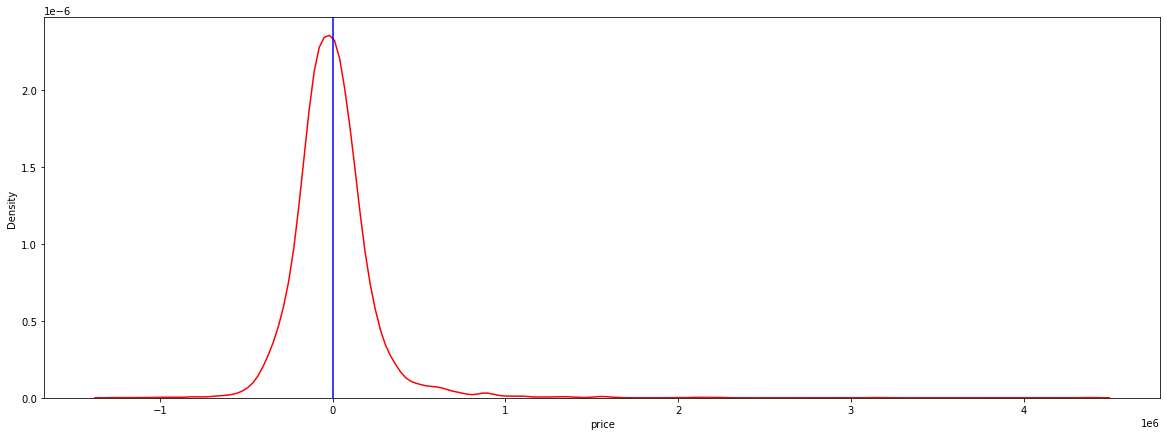

In [28]:
#nature of error,
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(20,7))
sns.distplot(error,color="red",hist=False)
plt.axvline(error.mean(),color="blue")
plt.show()

# observations:
There is a clear pattern in ypred and y_test which means the prediction are not accurate.
the graph of error follows a normal distribution which means the errors have homosedascity.


# Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.95330835702225

In [30]:
ypred2=rf.predict(X_test)
ypred2

array([352812.99, 804947.68, 717792.5 , ..., 392072.85, 394843.49,
       431754.5 ])

In [31]:
# checking the accuracy report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("mean absolute error:",mean_absolute_error(y_test,ypred2))
print("mean squared error:",mean_squared_error(y_test,ypred2))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,ypred2)))
print("r2 score:",r2_score(y_test,ypred2))

mean absolute error: 136818.76924710642
mean squared error: 42988628591.86261
root mean squared error: 207336.99282053506
r2 score: 0.6749099165360561


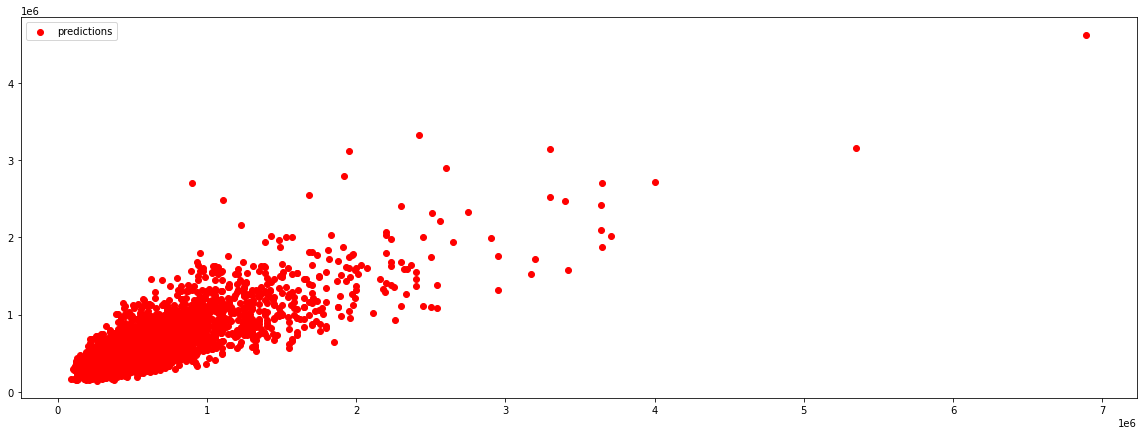

In [32]:
# checking relationship between ytest and ypred2
plt.figure(figsize=(20,7))
plt.scatter(y_test,ypred2,label="predictions",color="red")
plt.legend()
plt.show()

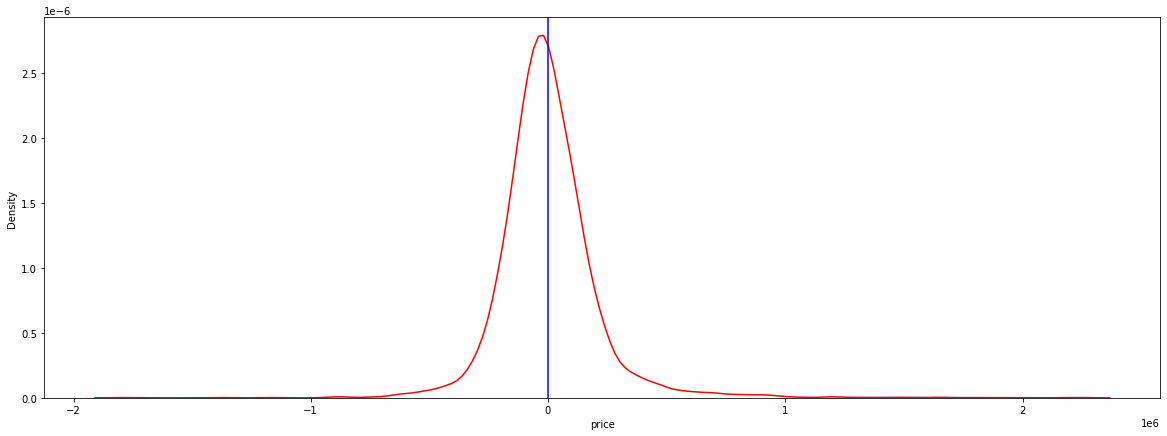

In [33]:
#nature of error,
error2=y_test-ypred2
plt.figure(figsize=(20,7))
sns.distplot(error2,color="red",hist=False)
plt.axvline(error.mean(),color="blue")
plt.show()

## Observations:
Clearly,the model trained better than linear Regression but still it is not the best one.

# XGBRegressor

In [34]:
import xgboost as xg
xgr=xg.XGBRegressor(n_estimators=1000,eta=0.1)
xgr.fit(X_train,y_train)
xgr.score(X_train,y_train)

0.9510144209411112

In [35]:
ypred3=xgr.predict(X_test)
ypred3

array([332544.94, 884735.9 , 774116.44, ..., 376179.22, 346807.88,
       422884.4 ], dtype=float32)

In [36]:
# checking the accuracy report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("mean absolute error:",mean_absolute_error(y_test,ypred3))
print("mean squared error:",mean_squared_error(y_test,ypred3))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,ypred3)))
print("r2 score:",r2_score(y_test,ypred3))

mean absolute error: 137938.4654004087
mean squared error: 45054141871.966324
root mean squared error: 212259.6096104163
r2 score: 0.6592900210748666


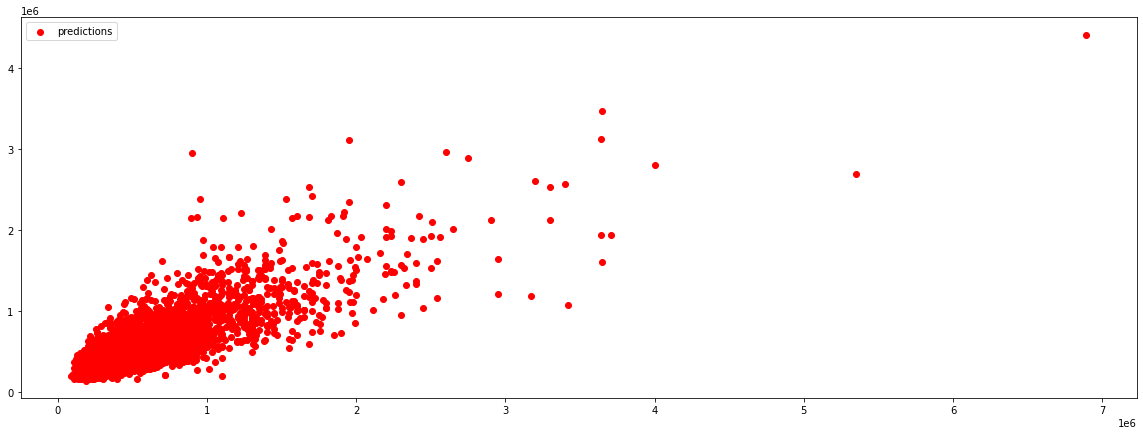

In [37]:
# checking relationship between ytest and ypred3
plt.figure(figsize=(20,7))
plt.scatter(y_test,ypred3,label="predictions",color="red")
plt.legend()
plt.show()

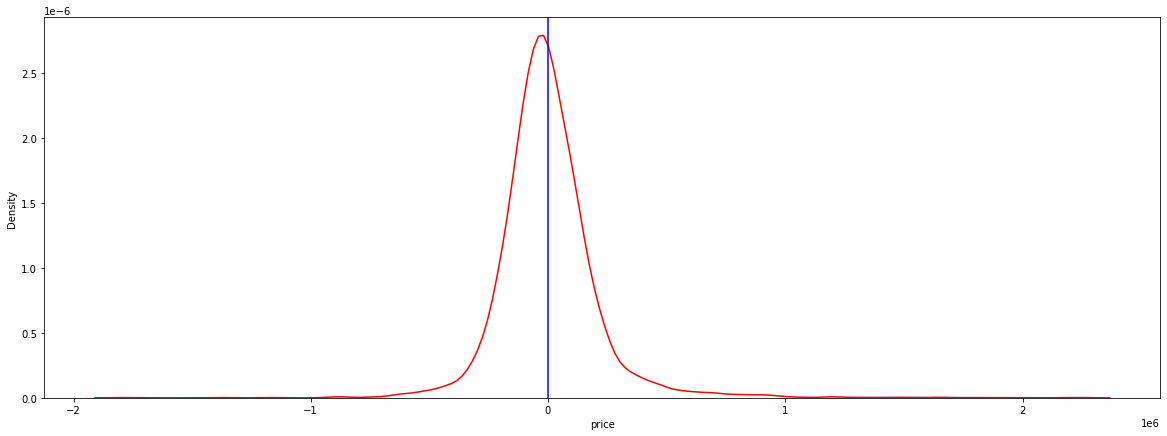

In [38]:
#nature of error,
error2=y_test-ypred2
plt.figure(figsize=(20,7))
sns.distplot(error2,color="red",hist=False)
plt.axvline(error.mean(),color="blue")
plt.show()

## Observations:
The model is better than Linear Regression but worse than Random Forest Regressor

# Decison tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree.score(X_train,y_train)

0.9999022873900927

In [40]:
ypred4 = tree.predict(X_test)
ypred4

array([ 385000., 1010000.,  715000., ...,  450000.,  355950.,  435000.])

In [41]:
# checking the accuracy report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("mean absolute error:",mean_absolute_error(y_test,ypred4))
print("mean squared error:",mean_squared_error(y_test,ypred4))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,ypred4)))
print("r2 score:",r2_score(y_test,ypred4))

mean absolute error: 184794.40129549662
mean squared error: 82312178715.38063
root mean squared error: 286900.9911369785
r2 score: 0.3775360153324969


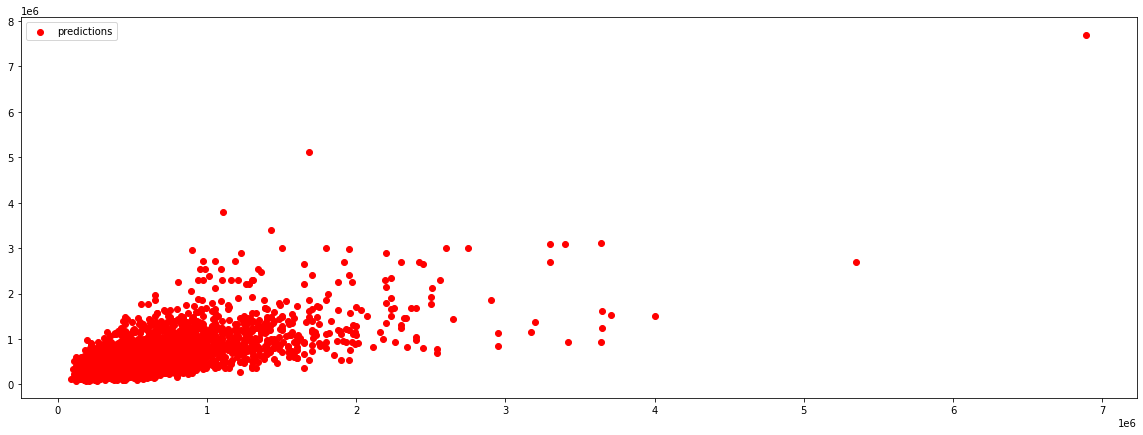

In [42]:
# checking relationship between ytest and ypred3
plt.figure(figsize=(20,7))
plt.scatter(y_test,ypred4,label="predictions",color="red")
plt.legend()
plt.show()

## Observations:
This model performs worst than all other models.

# Deep learning network

In [43]:
# building neural network model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import sqrt
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
err = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: %.3f, \nRoot Mean Squared Error: %.3f' % (err, sqrt(err)))

Mean Squared Error: 64254361600.000, 
Root Mean Squared Error: 253484.441


# Conclusion:
The random Forest regressor model gave the maximum accuracy while the neural network did not give much accuracy but still took the max time to run.